'''1.qu'est que le Video_Games_Sales_as_at_22_Dec_2016.csv ?
Ces données enregistrent les ventes et les évaluations annuelles des jeux vidéo dans le monde dans 2020. Le contenu comprend le nom du jeu, le format du jeu, l'année de sortie du jeu, le type de jeu, l'éditeur du jeu et la société d'édition,
Ventes de jeux en Amérique du Nord (en millions), ventes de jeux dans l'Union européenne (en millions), ventes de jeux au Japon (en millions), ventes dans les autres régions (en millions de ventes) ), ventes mondiales totales (en millions), nombre de notes, nombre de critiques, évaluations des utilisateurs, nombre d'utilisateurs (en millions), société de développement de jeux, évaluation des jeux. Ces données peuvent montrer la répartition des parts de marché mondiales des jeux vidéo et les types de jeux populaires.
'''

In [92]:
#2. Importer les librairies nécessaires et charger les données
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
data=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

#3.Afficher les données et commentez le dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


'''
↑En affichant les informations du fichier de table Excel, nous pouvons voir que ce fichier a 2M, 16 colonnes d'entités, chaque colonne a 16 718 données et un total de 16 719 lignes. Parmi eux, il y a 7 colonnes pour le type chaîne et 9 colonnes pour le type nombre.La proportion de données non vides est très élevée, indiquant qu'il s'agit d'un fichier de données valide et utilisable.
nom: nom du jeu
plateforme: format du jeu, plateforme logicielle prise en charge par le jeu
Year_of_Release: l'année de sortie du jeu
Genre: type de jeu
Éditeur: Game Publishing Company
NA_Sales: Ventes de jeux en Amérique du Nord (en millions)
EU_Sales: ventes de jeux dans l'Union européenne (en millions),
JP_Sales: volume des ventes de jeux au Japon (en millions)
Other_Sales: volume des ventes dans d'autres régions (en millions d'unités de vente)
Global_Sales: ventes mondiales totales (en millions)
Critic_Score: nombre de notes
Critic_Count: nombre d'avis
User_Score: score utilisateur
User_Count: le nombre d'utilisateurs (en millions)
Développeur: Game developer
Évaluation: Évaluation du jeu
'''
    

In [93]:
#↓Afficher les 5 premières lignes de données
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print(data["Platform"].unique())
print(data["Platform"].unique().size)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31


'''
↑On voit qu'il existe 31 formats de jeux différents，ils sont ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
'''

In [95]:
print(data["Global_Sales"].max())
maxgame=data[data["Global_Sales"].values==data["Global_Sales"].max()]
print(maxgame)

82.53
         Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
0      3.77         8.45         82.53          76.0          51.0          8   

   User_Count Developer Rating  
0       322.0  Nintendo      E  


'''
↑ le jeu avec le plus grand volume de ventes annuel au monde est WiiSports, et le volume de ventes annuel est 82.53 millions.
Platform de jeu est Wii,Il est sorti en 2006，est une jeu de sport , Publié et développé par Nintendo.
'''

In [96]:
year=np.sort(data["Year_of_Release"].unique())
print(year)
print(data["Year_of_Release"].unique().size)


[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.   nan]
40


In [97]:
'''
↑Le temps de sortie du jeu est de 1980 à 2020, un total de 39 ans
'''

'\n↑Le temps de sortie du jeu est de 1980 à 2020, un total de 39 ans\n'

In [98]:
print(data["Name"].unique().size)

11563


In [99]:
'''
↑Il y a 11563 jeux différents dans 16718 données
'''

'\n↑Il y a 11563 jeux différents dans 16718 données\n'

In [100]:
print(data["Name"][data["Year_of_Release"]==1980])

262           Asteroids
546     Missile Command
1764            Kaboom!
1968           Defender
2650             Boxing
4019         Ice Hockey
5360            Freeway
6301             Bridge
6876           Checkers
Name: Name, dtype: object


Text(0.5, 1.0, "La relation entre le volume de sortie du jeu et l'année")

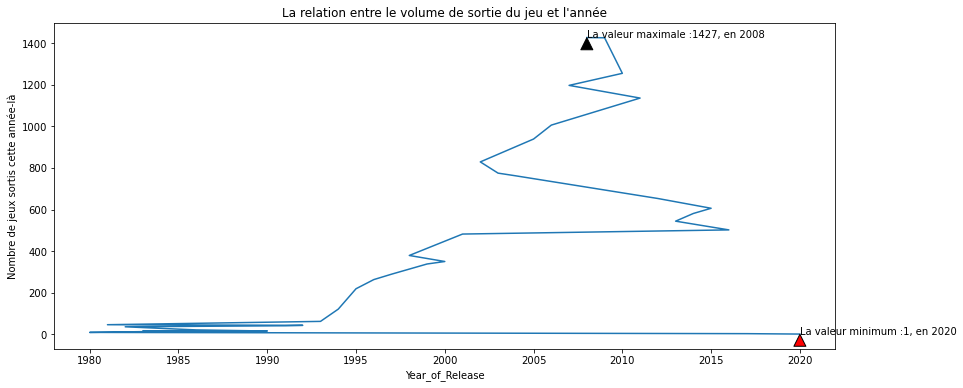

In [101]:
#4.En utilisant une technique de représentation graphique la plus adaptée, donnez lacourbe d’évolution du cours d’ouverture au cours du temps.
#↓Utilisez le courbe pour dessiner le nombre de jeux sortis par an de 1980 à 2020 au fil du Courbe d’évolution au cours du temps
plt.figure(figsize=(14,6))
plt.plot(data["Year_of_Release"].value_counts())
plt.annotate("La valeur maximale :1427, en 2008",xy=(2008.0,1427),arrowprops= dict(facecolor ='black',  shrink=0.1,width=2))
plt.annotate("La valeur minimum :1, en 2020",xy=(2020.0,1),arrowprops= dict(facecolor ='red',  shrink=0.1,width=2))
plt.xlabel("Year_of_Release")
plt.ylabel("Nombre de jeux sortis cette année-là")
plt.title("La relation entre le volume de sortie du jeu et l'année")


'''
↑5.Que peut on observer ?
On constate qu'entre 1980 et 2008, le nombre de sorties de jeux a augmenté rapidement et continuellement et a atteint son maximum en 2008. En 2008, 1 427 nouveaux jeux ont été lancés au total. De nouveaux jeux ont débuté en 2008. Le nombre de sorties continue de diminuer, le plus bas en 2020, un seul nouveau jeu est sorti
'''

In [102]:
print(data["Year_of_Release"].value_counts())

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64


In [103]:
'''
Traitement des données vides :
↓6. Identifiez et donnez le nombre de données vides (en nombre et en %)
'''


'\nTraitement des données vides :\n↓6. Identifiez et donnez le nombre de données vides (en nombre et en %)\n'

In [104]:
 
percentage=data.apply(lambda x:str(len(x[pd.isnull(x)==True]))+' est '+str(format(len(x[pd.isnull(x)==True])/16718,'.3%')))
print(percentage)
#nancol=[]
def find_nan(df):
    nan_lists={}
    for col in df.columns:
        nan_counter=0
        for i in df[col].isnull():
            if i:
                nan_counter +=1
                nan_lists[col]=nan_counter
    
    for k,v in nan_lists.items():
        #nancol.append(k)
        print('Le rang ',k,'en a',v,'manquant',format(v/16718,'.3%'))
find_nan(data)


Name                   2 est 0.012%
Platform               0 est 0.000%
Year_of_Release      269 est 1.609%
Genre                  2 est 0.012%
Publisher             54 est 0.323%
NA_Sales               0 est 0.000%
EU_Sales               0 est 0.000%
JP_Sales               0 est 0.000%
Other_Sales            0 est 0.000%
Global_Sales           0 est 0.000%
Critic_Score       8582 est 51.334%
Critic_Count       8582 est 51.334%
User_Score         6704 est 40.100%
User_Count         9129 est 54.606%
Developer          6623 est 39.616%
Rating             6769 est 40.489%
dtype: object
Le rang  Name en a 2 manquant 0.012%
Le rang  Year_of_Release en a 269 manquant 1.609%
Le rang  Genre en a 2 manquant 0.012%
Le rang  Publisher en a 54 manquant 0.323%
Le rang  Critic_Score en a 8582 manquant 51.334%
Le rang  Critic_Count en a 8582 manquant 51.334%
Le rang  User_Score en a 6704 manquant 40.100%
Le rang  User_Count en a 9129 manquant 54.606%
Le rang  Developer en a 6623 manquant 39.616%
Le r

'''
↓7. Quelle stratégie allez vous adopter pour traiter les données manquantes et pourquoi?
Pour les colonnes avec moins de valeurs manquantes, je supprimerai la ligne de données correspondante.
Pour les colonnes avec de nombreuses valeurs manquantes, je remplirai avec la valeur moyenne.
La suppression d'une ligne de données avec des valeurs manquantes peut garantir l'authenticité des données.
Si la valeur manquante est supérieure à la moitié, si on supprime tous les éléments d'une ligne de valeurs manquantes, de nombreux types de données seront manquants, ce qui entraînera le manque de données importantes, de sorte que  je  utilisée la valeur moyenne  pour remplir.
'''


In [105]:
notnan=data.dropna(axis=0,subset=["Name"] ,how='any',inplace=False)
print(notnan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.2+ MB
None


In [106]:

'''
Il y a des nombres et des str dans la colonne "User_Score", j'ai remplacé les chaînes par nan, puis j'ai rempli les valeurs nan avec la moyenne

'''

list1=list(notnan["User_Score"].values)
for i in range(len(list1)):
    if  str(list1[i]).isdigit()==False:
        notnan["User_Score"][notnan["User_Score"]==list1[i]]=np.nan
    else:
        notnan["User_Score"][notnan["User_Score"]==list1[i]]=float(list1[i])
notnan["User_Score"]=pd.to_numeric(notnan["User_Score"])

#notnan["User_Score"].fillna(notnan["User_Score"].mean(),inplace=True)
#print(notnan["User_Score"])

listn=["Critic_Score","Critic_Count","User_Score","User_Count"]
for i in listn:
    notnan[i].fillna(notnan[i].mean(),inplace=True)
    #print(i)


print(notnan["User_Score"])

<ipython-input-106-c9d98eb0a20a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notnan["User_Score"][notnan["User_Score"]==list1[i]]=float(list1[i])
D:\3\anaconda0\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-106-c9d98eb0a20a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notnan["User_Score"][notnan["User_Score"]==list1[i]]=np.nan


0        8.00000
1        7.04077
2        7.04077
3        8.00000
4        7.04077
          ...   
16714    7.04077
16715    7.04077
16716    7.04077
16717    7.04077
16718    7.04077
Name: User_Score, Length: 16717, dtype: float64


<ipython-input-106-c9d98eb0a20a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notnan["User_Score"]=pd.to_numeric(notnan["User_Score"])
D:\3\anaconda0\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [107]:
notnan["Developer"].fillna("inconnu",inplace=True)
notnan["Rating"].fillna("inconnu",inplace=True)
notnan["Genre"].fillna("inconnu",inplace=True)
notnan["Publisher"].fillna("inconnu",inplace=True)
notnan["Year_of_Release"].fillna("inconnu",inplace=True)
print(notnan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.2+ MB
None


[0.20159119459233116, 0.14045582341329185, 0.10468385475862894, 0.08972901836453909, 0.07914099419752348, 0.0779446072859963, 0.07471436262487288, 0.05311957887180714, 0.05228210803373811, 0.05078662439432913, 0.04085661302865347, 0.03469522043428845]
['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


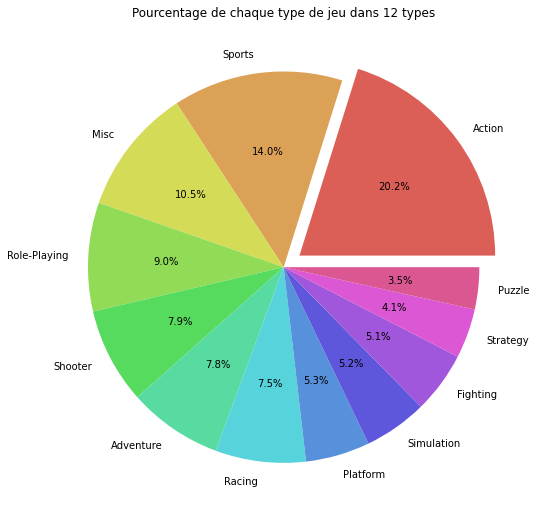

In [108]:
genre=notnan["Genre"].value_counts()
percen=[]
genr=[]
for i,k in zip(genre.tolist(),list(genre.index)):
    percen.append(i/len(notnan["Genre"]))
    genr.append(k)
print(percen)
print(genr)
exp=[0.1]+[0]*11
with sns.color_palette("hls",12):
    plt.figure(figsize=(14,9))
    plt.pie(x=percen,explode=exp,labels=genr,autopct='%1.1f%%')  
plt.title("Pourcentage de chaque type de jeu dans 12 types")
plt.show()

Need for Speed: Most Wanted                   12
Ratatouille                                    9
Madden NFL 07                                  9
FIFA 14                                        9
LEGO Marvel Super Heroes                       9
                                              ..
Final Fantasy VII International                1
Star Wars The Clone Wars: Lightsaber Duels     1
Bleach: Hanatareshi Yabou                      1
Snowboard Kids                                 1
Ni no Kuni: Wrath of the White Witch           1
Name: Name, Length: 11562, dtype: int64
                              Name Platform Year_of_Release   Genre  \
253    Need for Speed: Most Wanted      PS2            2005  Racing   
523    Need for Speed: Most Wanted      PS3            2012  Racing   
1190   Need for Speed: Most Wanted     X360            2012  Racing   
1591   Need for Speed: Most Wanted     X360            2005  Racing   
1998   Need for Speed: Most Wanted       XB            2005  Racin

'\n↑On peut voir que les jeux au format PS2 ont les plus grosses ventes au monde, et les jeux notés T conviennent aux adultes de plus de \n13 ans. Le format de jeu est DS et GBA avec le moins de ventes au monde, et la note est E. Jeux adaptés aux enfants de moins de 3 ans\n'

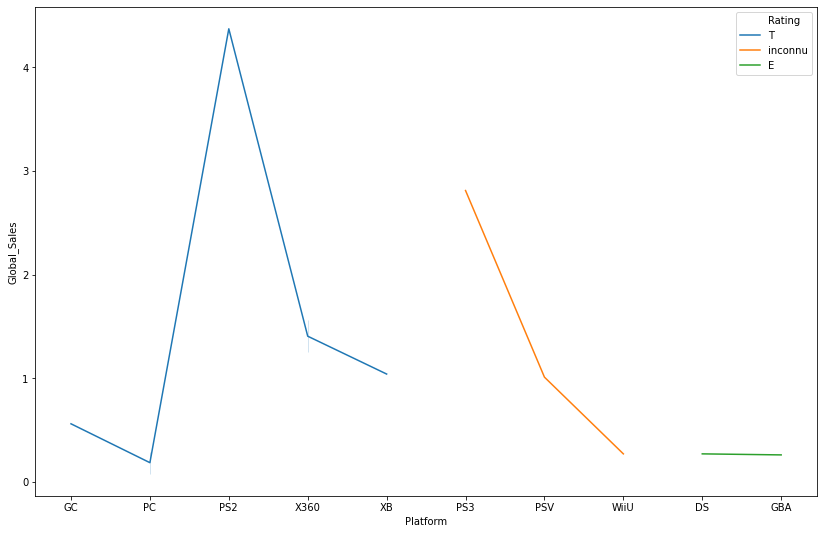

In [109]:
print(notnan["Name"].value_counts())
#↑Le jeu Need for Speed: Most Wanted a le plus de données, avec 12 lignes de données
needforspeed=notnan[notnan["Name"]=="Need for Speed: Most Wanted"]

print(needforspeed)
plt.figure(figsize=(14,9))
sns.lineplot(data=needforspeed,x="Platform",y="Global_Sales",hue="Rating")
'''
↑On peut voir que les jeux au format PS2 ont les plus grosses ventes au monde, et les jeux notés T conviennent aux adultes de plus de 
13 ans. Le format de jeu est DS et GBA avec le moins de ventes au monde, et la note est E. Jeux adaptés aux enfants de moins de 3 ans
'''


PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
31


Text(0.5, 1.0, 'Tableau de relation entre le format de jeu et le nombre de jeux')

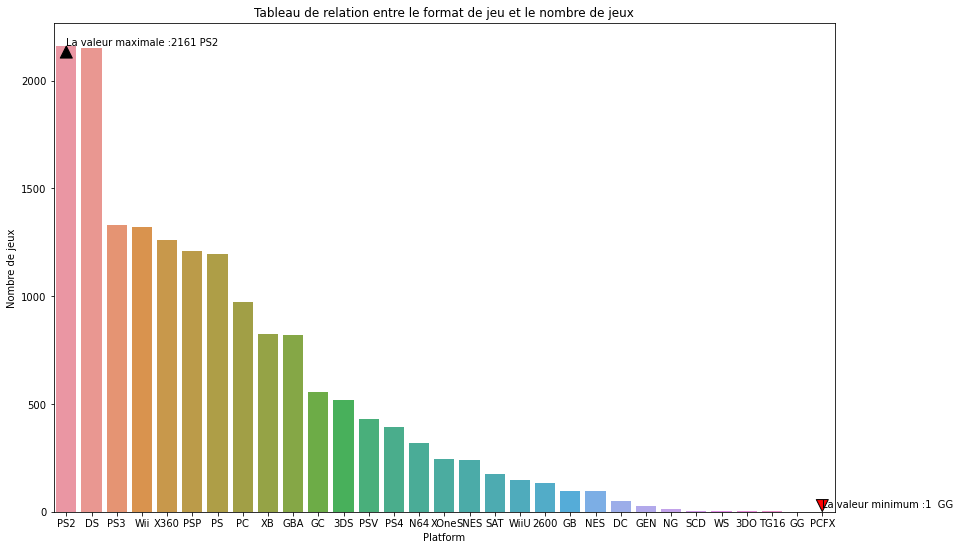

In [110]:
print(notnan["Platform"].value_counts())
print(len(notnan["Platform"].value_counts()))
plt.figure(figsize=(14,9))
#sns.relplot(data=notnan["Platform"].value_counts(),kind="line")
sns.barplot(notnan["Platform"].value_counts().index,notnan["Platform"].value_counts().values)
plt.annotate("La valeur maximale :2161 PS2",xy=(0,2161),arrowprops= dict(facecolor ='black',  shrink=0.1,width=2))
plt.annotate("La valeur minimum :1  GG",xy=(30,1),xytext=(30,20),arrowprops= dict(facecolor ='red',  shrink=0.1,width=2))
plt.xlabel("Platform")
plt.ylabel("Nombre de jeux")
plt.title("Tableau de relation entre le format de jeu et le nombre de jeux")

In [111]:
print(notnan["Publisher"].value_counts())

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Lighthouse Interactive             1
HAL Laboratory                     1
White Park Bay Software            1
Fuji                               1
mixi, Inc                          1
Name: Publisher, Length: 582, dtype: int64


138


Text(0.5, 1.0, 'Tableau des ventes totales de jeux dans chaque région du monde pour les 30 premières entreprises qui ont développé le plus de jeux')

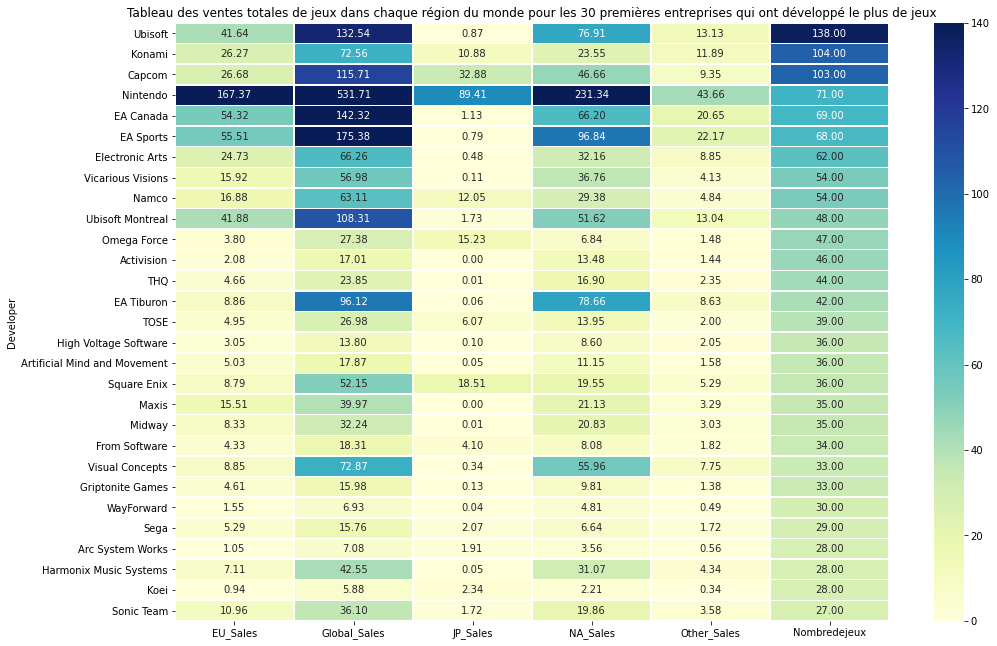

In [112]:

#print(notnan["Developer"].value_counts().head(20))
ubisof=notnan["Name"][notnan["Developer"]=="Ubisoft"].unique().size
print(ubisof)
#↑Au niveau mondial, Ubisoft a le plus grand nombre de jeux développés，138 
zone=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
deve=notnan.pivot_table(index="Developer",values=zone,aggfunc=np.sum)

counts=[]
for i in list(deve.index):
    counts.append(notnan["Name"][notnan["Developer"]==i].unique().size)
deve["Nombredejeux"]=pd.Series(np.array(counts),index=deve.index)
deve1=deve.sort_values("Nombredejeux",ascending=False)
deve30=deve1.loc[list(deve1.index)[1:30]]

#print(deve30)
'''
↑Comptez les 30 meilleures sociétés de développement de jeux avec le plus grand nombre de jeux développés au monde, et calculez
leurs ventes totales de jeux et le noe de développements de jeux dans toutes les régions du monde
'''
plt.figure(figsize=(16,11))
sns.heatmap(deve30,vmin=0,vmax=140,annot=True,fmt='.2f',linewidth=0.5,cmap="YlGnBu")
plt.title("Tableau des ventes totales de jeux dans chaque région du monde pour les 30 premières entreprises qui ont développé le plus de jeux")


In [113]:
'''
↓Vérifiez la situation des trois sociétés de jeux les plus célèbres au monde, Nintendo, Ubisoft et Sega
'''
dev3=pd.concat([notnan[notnan["Developer"]=="Ubisoft" ],notnan[notnan["Developer"]=="Nintendo"],notnan[notnan["Developer"]=="Sega" ]],axis=0)




<Figure size 1152x576 with 0 Axes>

"\n↑Nous pouvons voir que Nintendo a le score d'évaluation de jeu le plus élevé et le plus d'utilisateurs，ubisoft a beaucoup d'utilisateurs\n"

<Figure size 576x864 with 0 Axes>

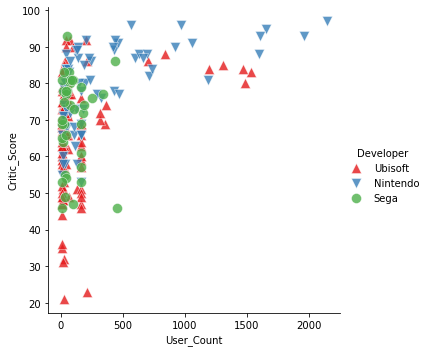

In [114]:
plt.figure(figsize=(8,12))

f=sns.FacetGrid(dev3,hue="Developer",palette="Set1",height=5,hue_kws={"marker":["^","v","o"]})
f.map(plt.scatter,"User_Count","Critic_Score",s=100,linewidth=0.5,edgecolor="white",alpha=0.8)
f.add_legend()
'''
↑Nous pouvons voir que Nintendo a le score d'évaluation de jeu le plus élevé et le plus d'utilisateurs，ubisoft a beaucoup d'utilisateurs
'''

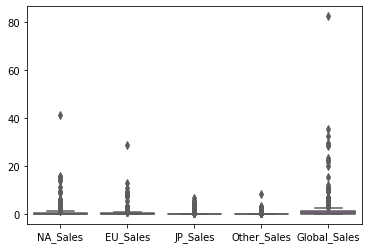

In [115]:
sns.boxplot(data=dev3[zone],palette=sns.color_palette("hls",5))

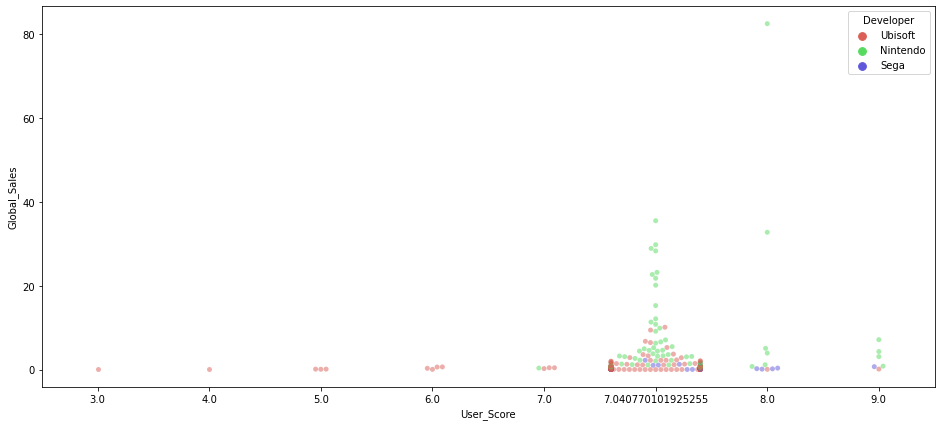

In [116]:
plt.figure(figsize=(16,7))
sns.swarmplot(data=dev3,x=dev3["User_Score"],y=dev3["Global_Sales"],hue="Developer",color="w",alpha=0.5,palette=sns.color_palette("hls",3))

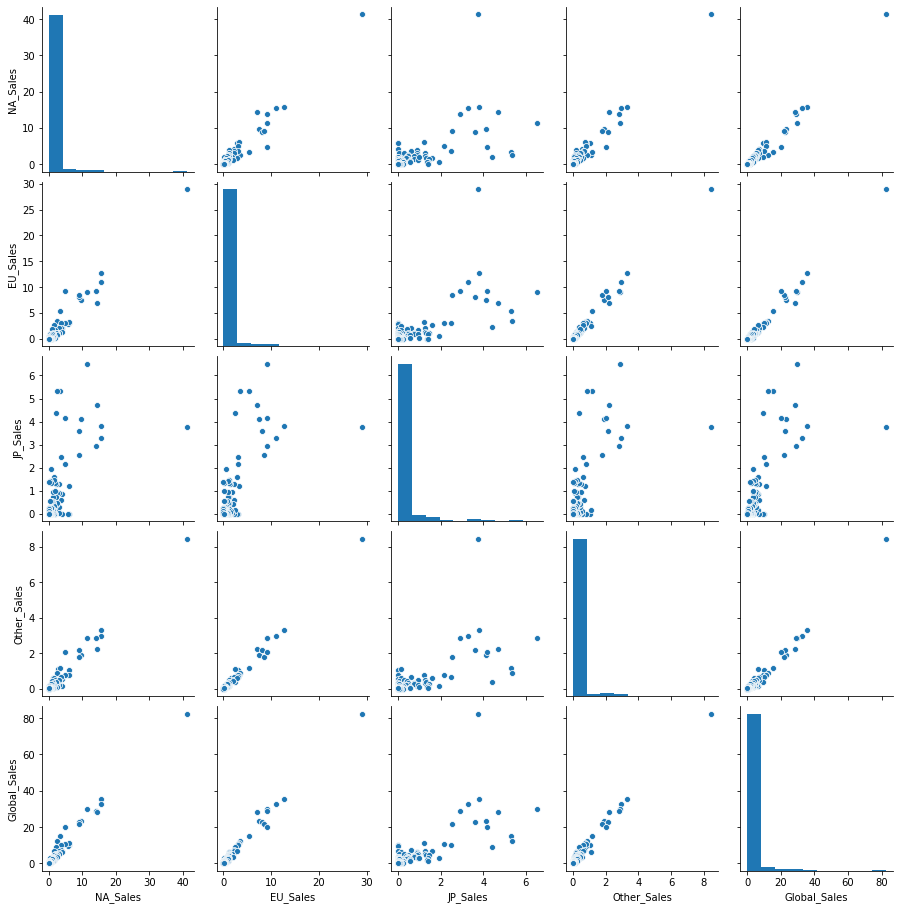

In [117]:
sns.pairplot(dev3[zone])